# Example usage of Statistical Clear Sky Fitting (SCSF)

This notebook shows the basic usage of the SCSF algorithm and code. The source of the data is [NREL's PVDAQ service](https://developer.nrel.gov/docs/solar/pvdaq-v3/). `solardatatools` is a dependency for Statistical Clear Sky, and additional tools are utilized here to prepaire the data for analysis.

### Imports

In [1]:
from statistical_clear_sky import IterativeFitting
from solardatatools import DataHandler, get_pvdaq_data

### Grab a data set from PVDAQ

The `get_pvdaq_data` function is provided by `solardatatools` as an API wrapper for PVDAQ.

In [2]:
df = get_pvdaq_data(sysid=35, api_key='DEMO_KEY', year=[2011, 2012, 2013])

### Process the data into a clean matrix for analysis

In [3]:
dh = DataHandler(df)
dh.run_pipeline(use_col='ac_power')
dh.report()

total time: 2.22 seconds
form matrix: 0.06, fill matrix: 0.50, fix time shifts: 0.50, 
daily scores: 0.18, daily flags: 0.02, clear detect: 0.16, 
clipping check: 0.19, data scoring: 0.60
Length:                1094 days
Data sampling:         15 minute
Data quality score:    99.5%
Data clearness score:  58.0%
Inverter clipping:     False
Time shifts corrected: False


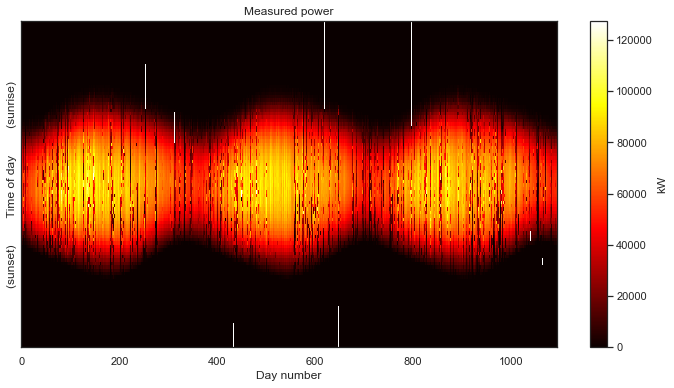

In [4]:
dh.plot_heatmap(matrix='raw');

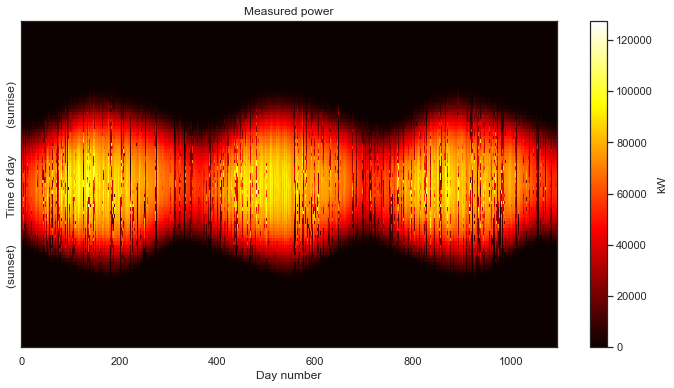

In [5]:
dh.plot_heatmap(matrix='filled');

### Setup and execute the SCSF algorithm using all default values

In [6]:
scsf = IterativeFitting(data_handler_obj=dh)

In [7]:
scsf.execute()

obtaining weights
obtaining initial value of component r0
Starting at Objective: 6.457e+09, f1: 2.413e+07, f2: 5.157e+02, f3: 4.873e+09, f4: 1.559e+09
    Minimizing left matrix
    Minimizing right matrix
1 - Objective: 2.287e+07, f1: 2.128e+07, f2: 5.083e+02, f3: 1.593e+06, f4: 8.709e-04
    Minimizing left matrix
    Minimizing right matrix
2 - Objective: 2.000e+07, f1: 1.838e+07, f2: 2.247e+03, f3: 1.618e+06, f4: 4.614e-04
    Minimizing left matrix
    Minimizing right matrix
3 - Objective: 1.968e+07, f1: 1.807e+07, f2: 1.755e+03, f3: 1.608e+06, f4: 3.167e-04
    Minimizing left matrix
    Minimizing right matrix
4 - Objective: 1.962e+07, f1: 1.801e+07, f2: 1.619e+03, f3: 1.601e+06, f4: 2.903e-03
    Minimizing left matrix
    Minimizing right matrix
5 - Objective: 1.960e+07, f1: 1.800e+07, f2: 1.572e+03, f3: 1.598e+06, f4: 3.228e-04
Minimization complete in 0.44 minutes


### Inspect the results of the SCSF procedure

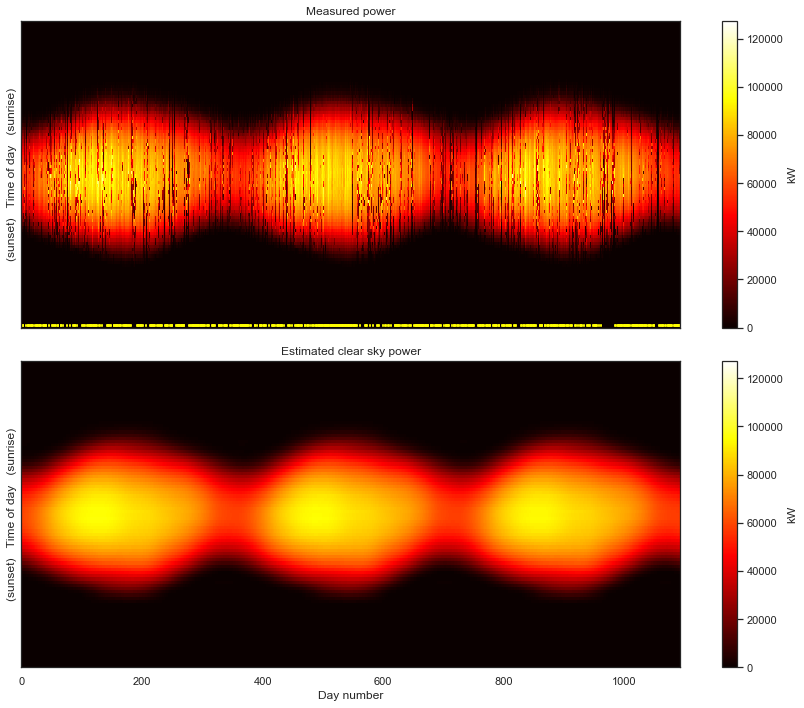

In [8]:
scsf.plot_measured_clear(show_days=True);

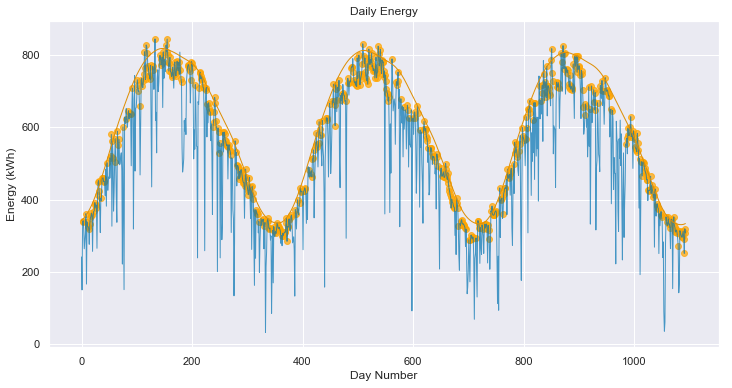

In [9]:
scsf.plot_energy(show_clear=True, show_days=True, scale_power=True)
plt.title('Daily Energy')
plt.xlabel('Day Number')
plt.ylabel('Energy (kWh)');

In [10]:
print('Estimated degradation: {:.2f}% per year'.format(scsf.beta_value.item() * 100))

Estimated degradation: -0.65% per year


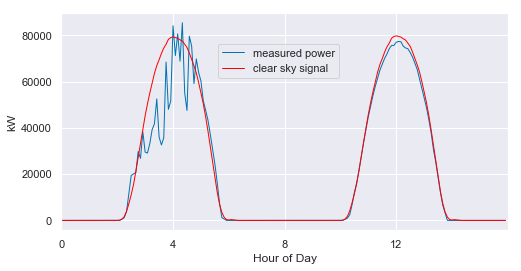

In [11]:
scsf.ts_plot(start_day=50)